In [6]:
import pickle
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import statsmodels.api as sm
import random
import math

In [7]:
sns.set()

In [ ]:
"C:\Users\mateu\Desktop\Studia\Semestr 4\Symulacje komputerowe\Risk process and Brownian motion\262227.p"

In [20]:
data = pickle.load(open("C:/Users/mateu/Desktop/Studia/Semestr 4/Symulacje komputerowe/Risk process and Brownian motion/262227.p", "rb"))
data[1][:15]

[50.0,
 50.4375,
 50.875,
 51.3125,
 51.75,
 52.1875,
 38.805943407170766,
 39.243443407170766,
 39.680943407170766,
 40.118443407170766,
 40.555943407170766,
 40.993443407170766,
 41.430943407170766,
 41.868443407170766,
 42.305943407170766]

In [21]:
len(data[0])

10001

In [22]:
np.sum(data, axis=0)/50

array([  50.        ,   50.25458215,   50.69208215, ..., 1964.11771133,
       1964.32160017, 1964.64007134])

In [23]:
data[0][1] - data[0][0]

0.4375

In [24]:
data[1][1] - data[1][0]

0.4375

In [25]:
data[5][1] - data[5][0]

0.4375

In [26]:
data[23][1] - data[23][0]

0.4375

In [27]:
c = 43.75

In [28]:
def spadki_pojedyncze(data, c=43.75):
    lista = []
    for i in range(0, 50):
        for j in range(0, 10000):
            if round(data[i][j+1],4) != round(data[i][j] + c*0.01,4):
                lista.append(round(data[i][j]-data[i][j+1] + c*0.01,4))
    return lista

In [35]:
X_i = (spadki_pojedyncze(data))
X_i[:15]

[9.8839,
 12.1327,
 32.1091,
 5.546,
 5.8095,
 0.7913,
 25.0789,
 0.1355,
 2.3551,
 13.3228,
 3.6666,
 3.0528,
 1.815,
 1.9821,
 12.5444]

In [36]:
np.mean(X_i)

10.119108258616434

In [37]:
def spadki_pojedyncze(data, c=43.75):
    lista_c = []
    for i in range(0, 50):
        for j in range(0, 10000):
            if round(data[i][j+1],4) == round(data[i][j] + c*0.01,4):
                lista_c.append(round(data[i][j+1]-data[i][j],4)/0.01)
    return lista_c

lista_c = spadki_pojedyncze(data)

In [38]:
len(lista_c)

487843

C:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


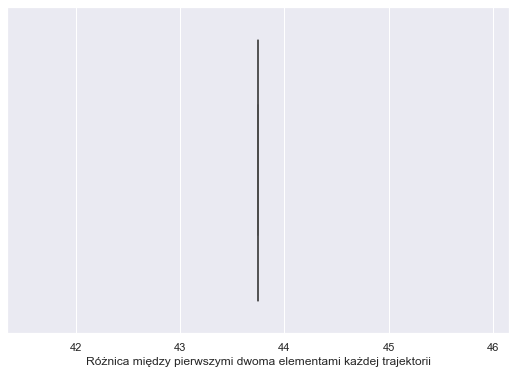

In [39]:
plt.figure(figsize=(9,6))

sns.boxplot(lista_c)
plt.xlabel("Różnica między pierwszymi dwoma elementami każdej trajektorii")

plt.savefig("box1.pdf", format="pdf", bbox_inches="tight")

In [40]:
EX_i = np.mean(X_i)
EX_i

10.119108258616434

In [41]:
1/EX_i

0.09882293720382908

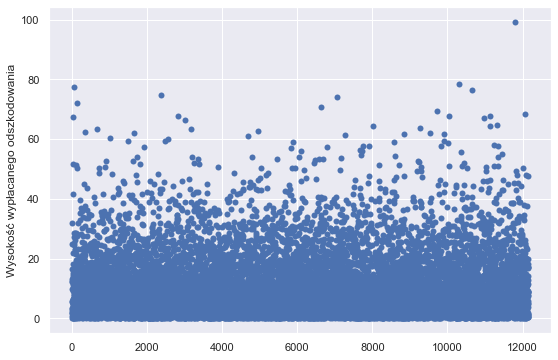

In [42]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=X_i, linewidth=0)

plt.ylabel("Wysokość wypłacanego odszkodowania")
plt.savefig("scatter1.pdf", format="pdf", bbox_inches="tight")

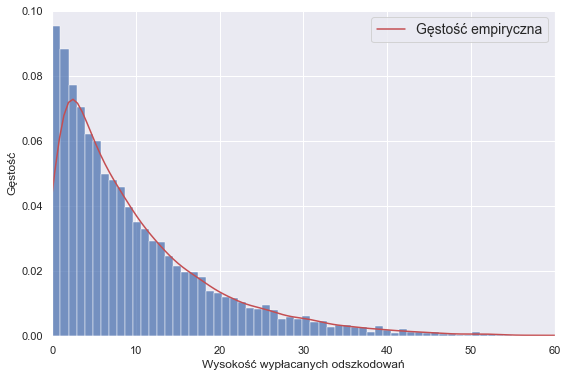

In [43]:
plt.figure(figsize=(9,6))
sns.histplot(X_i, kde=False, stat="density")

sns.kdeplot(X_i, color="r", label="Gęstość empiryczna")

x_axis = np.arange(0,60,0.1)

plt.xlim([0,60])

plt.legend(prop={'size': 14})
plt.ylabel("Gęstość")
plt.xlabel("Wysokość wypłacanych odszkodowań")
plt.savefig("histogram1.pdf", format="pdf", bbox_inches="tight")

C:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


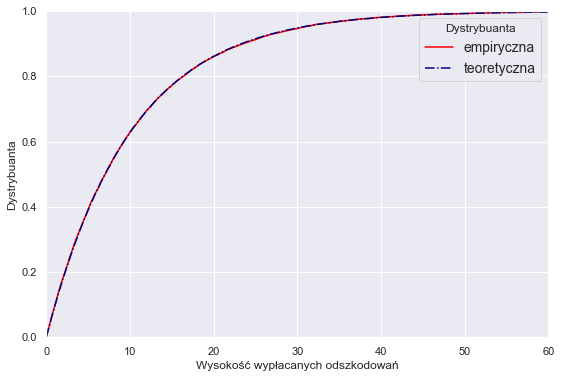

In [44]:
plt.figure(figsize=(9,6))

sns.ecdfplot(X_i, color="red", label="empiryczna")
sns.lineplot(x_axis,[scipy.stats.expon.cdf(i,scale=EX_i) for i in x_axis], color = "navy", linestyle="-.", label="teoretyczna")

plt.xlim([0,60])


plt.legend(title="Dystrybuanta", prop={'size': 14})
plt.ylabel("Dystrybuanta")
plt.xlabel("Wysokość wypłacanych odszkodowań")
plt.savefig("dystrybuanta1.pdf", format="pdf", bbox_inches="tight")

C:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 648x432 with 0 Axes>

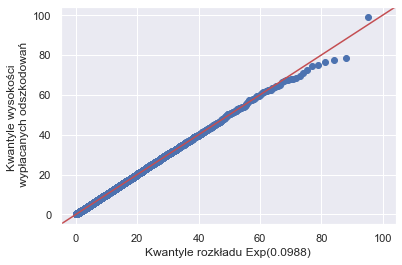

In [45]:
plt.figure(figsize=(9,6))

sm.qqplot(np.array(X_i), line ='45',dist = scipy.stats.expon(scale=EX_i),color = "purple");


plt.ylabel("Kwantyle wysokości \n wypłacanych odszkodowań")
plt.xlabel("Kwantyle rozkładu Exp(0.0988)")
plt.savefig("qqplot1.pdf", format="pdf", bbox_inches="tight")

# ROZKŁAD CZASÓW OCZEKIWANIA NA SPADKI

In [46]:
def momenty_skokow(data, c=43.75):
    czasy_oczekiwania = []
    for i in range (len(data)):
        momenty=[]
        for j in range (len(data[i])-1):
            if round(data[i][j+1],2) != round(data[i][j] + c*0.01,2):
                moment=(j+1)/100
                momenty.append(moment) 
        times = np.diff(momenty)
        times_as_list = list(times) 
                                    
        czasy_oczekiwania += times_as_list
    return czasy_oczekiwania

In [47]:
czasy_oczekiwania = momenty_skokow(data)
czasy_oczekiwania[:15]

[1.08,
 0.11999999999999988,
 2.04,
 0.8199999999999998,
 0.9699999999999998,
 0.03000000000000025,
 0.08999999999999986,
 0.0600000000000005,
 0.0699999999999994,
 0.13000000000000078,
 0.33999999999999986,
 0.1899999999999995,
 0.020000000000000462,
 0.1299999999999999,
 0.9500000000000002]

In [112]:
lam = np.mean(moments(data)) #srednia czasow oczekiwania, czyli exp(1/lambda) i N(t) ma 1/lambda
print(1/lam)
print(lam)


2.438788406533268
0.4100396727002231


In [125]:
lam_p = 1/lam
lam_p

2.438788406533268

In [113]:
EX_i

10.119108258616434

In [114]:
theta = (c/((1/lam)*EX_i))-1
print(theta)

0.7728079611520591


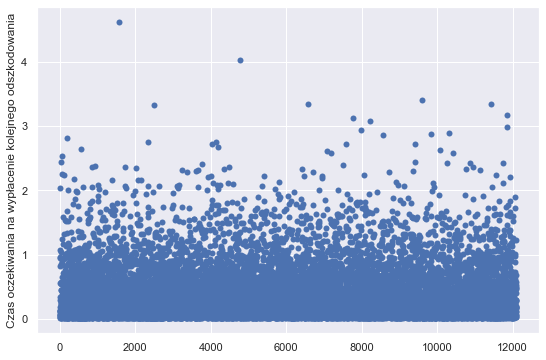

In [115]:
plt.figure(figsize=(9,6))

sns.scatterplot(data=czasy_oczekiwania, linewidth=0)

plt.ylabel("Czas oczekiwania na wypłacenie kolejnego odszkodowania")
plt.savefig("scatter2.pdf", format="pdf", bbox_inches="tight")

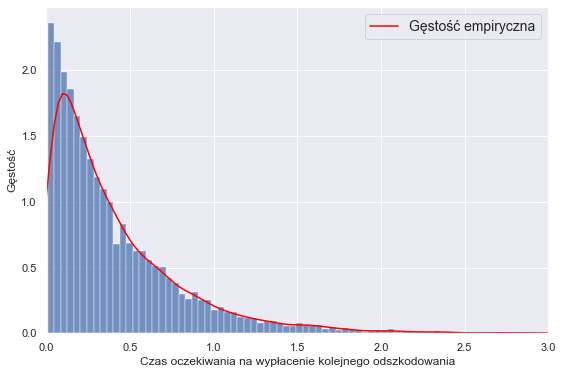

In [118]:
plt.figure(figsize=(9,6))

sns.histplot(czasy_oczekiwania, stat = "density")
sns.kdeplot(czasy_oczekiwania, color="red", label="Gęstość empiryczna")

plt.xlim([0,3])


plt.legend(prop={'size': 14})
plt.ylabel("Gęstość")
plt.xlabel("Czas oczekiwania na wypłacenie kolejnego odszkodowania")
plt.savefig("histogram2.pdf", format="pdf", bbox_inches="tight")

C:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


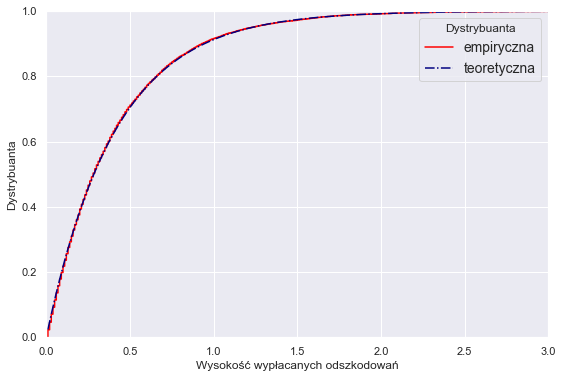

In [124]:
plt.figure(figsize=(9,6))

sns.ecdfplot(czasy_oczekiwania, color="red", label="empiryczna") 
x_axis2 = np.arange(np.min(czasy_oczekiwania),np.max(czasy_oczekiwania),0.0001)
sns.lineplot(x_axis2,[scipy.stats.expon.cdf(i,scale=lam) for i in x_axis2], color = "navy", linestyle="-.", label="teoretyczna")

plt.xlim([0,3])


plt.legend(title="Dystrybuanta", prop={'size': 14})
plt.ylabel("Dystrybuanta")
plt.xlabel("Wysokość wypłacanych odszkodowań")
plt.savefig("dystrybuanta2.pdf", format="pdf", bbox_inches="tight")

C:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 648x432 with 0 Axes>

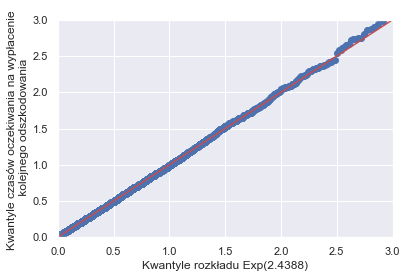

In [126]:
plt.figure(figsize=(9,6))

sm.qqplot(np.array(czasy_oczekiwania), line ='45', dist=scipy.stats.expon(scale=lam),color = "purple");

plt.xlim([0,3])
plt.ylim([0,3])

plt.ylabel("Kwantyle czasów oczekiwania na wypłacenie \n kolejnego odszkodowania")
plt.xlabel("Kwantyle rozkładu Exp(2.4388)")
plt.savefig("qqplot2.pdf", format="pdf", bbox_inches="tight")

# SYMULACJE

In [199]:
def generate_Rt(lam, T=100, u=50):
    times = []
    
    while sum(times)<T:
        t = scipy.stats.expon.rvs(scale = lam)
        times.append(t)
    
    #momenty 
    x_axis = [0] + np.cumsum(times) 
    
    X_i = scipy.stats.expon.rvs(size=len(x_axis), scale = EX_i) #wysokości spadków
    R_list = []
    count=0
    
    for i in x_axis:
        R = u + c*i - sum(X_i[:count+1])
        R_list.append(R)
        count += 1
   
    return(x_axis, R_list)

In [209]:
xdf = generate_Rt(lam,T=100)

In [208]:
len(xdf[0])

86

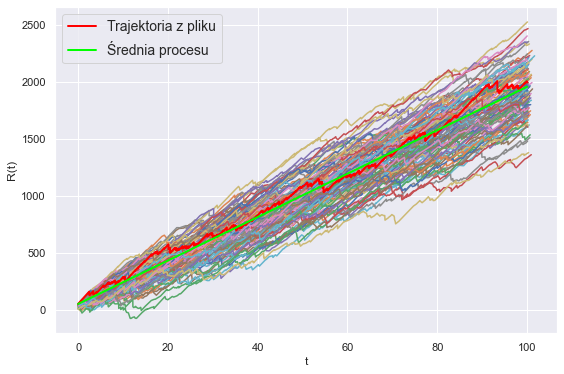

In [217]:
plt.figure(figsize=(9,6))

for i  in range(100):
    rt = generate_Rt(1/lam_p, T=100)
    x = rt[0]
    y = rt[1]
    plt.plot(x,y)

    
plt.plot(np.arange(0,100.01, 0.01),data[9], color = "red", linewidth=2, label = "Trajektoria z pliku")
plt.plot(np.arange(0,100.01,0.01), sr_pr_ryz, color = "lime", linewidth=2, label = "Średnia procesu")


    
plt.legend(prop={'size': 14})
plt.ylabel("R(t)")
plt.xlabel("t")
plt.savefig("symulacja1.pdf", format="pdf", bbox_inches="tight")

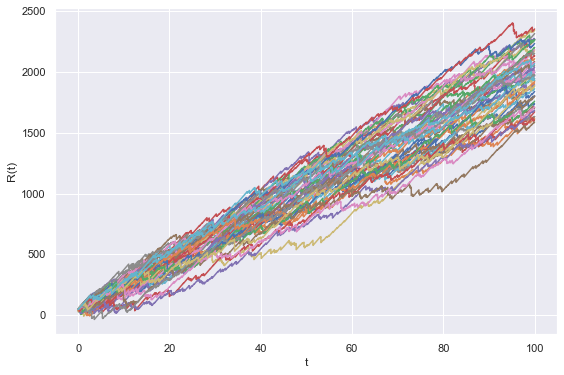

In [219]:
plt.figure(figsize=(9,6))

for i in range(0,len(data)):
    x = np.arange(0,100.01,0.01)
    plt.plot(x, data[i])

    
plt.ylabel("R(t)")
plt.xlabel("t")
plt.savefig("dane.pdf", format="pdf", bbox_inches="tight")

In [252]:
#dla danych z pliku

counter = 0
for i in range(0, 50):
        for j in range(0, 10000):
            if data[i][j] < 0:
                counter+=1
                break
                
counter/50

0.06

In [227]:
sum([min(data[i]) <0  for i in range(len(data)) ])/len(data)

0.06

In [249]:
def Poiss_time(T, lambda_=lam_p):
    S_i = []
    t = 0
    while T > t:
        U = np.random.rand()
        S_i.append(t)
        t -= (1/lambda_)*np.log(U)
    return S_i

In [250]:
def prawd_ruiny(lam=lam_p, mu=EX_i, theta=theta, u=50, T=200):
    n = 0
    c = (1+theta)*EX_i*(lam)
    for _ in range(1000):
        p = Poiss_time(T,lam)
        R = np.ndarray(len(p))
        x = scipy.stats.expon.rvs(scale = EX_i, size=len(p))
        for index, i in enumerate(p):
            R[int(index)] = u + c * i - np.sum(x[:index])
            if R[index] < 0:
                n += 1
                break
    return(n/1000)

In [251]:
prawd_ruiny()

0.138

In [248]:
print(prawd_ruiny(1, 10, 0.5, 50, 100))

0.126


In [236]:
print(prawd_ruiny(1, 10, 0.5, 50, 200))

0.134


In [237]:
print(prawd_ruiny(1/lam, mu, theta, 50, 200))

0.125
